In [1]:
import numpy as np
import sys
import os
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
stats = {}
for pred in os.listdir('./'):
    if 'retest' in pred:
        print(pred)
        stats[pred]=[]
        with open(pred, 'r') as f:
            lines = f.readlines()
        for i in range(0, len(lines), 3):
            counter = re.sub('[\[\]]','', lines[i].strip()).split()
            counter = [int(c) for c in counter]
            prediction = lines[i+1].strip().split(':')[1]
            ospf = lines[i+2].strip()
            stats[pred].append([counter, prediction, ospf])
    

retest_loss_20
retest_loss_15
retest_loss_10
retest_loss_0


In [3]:
for k,i in stats.items():
    predicted_paths = []
    print(k, i[0][2])
    for x in i:
        predicted_paths.append(x[1])
    print(Counter(predicted_paths))
    print()


retest_loss_10 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 121, "['r1', 'r2', 'r3']": 73, "['r1', 'ri2', 'ri3', 'r3']": 4, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 2})

retest_loss_0 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'r2', 'r3']": 114, "['r1', 'ri2', 'r3']": 79, "['r1', 'ri2', 'ri3', 'r3']": 6, "['r1', 'r6', 'ri4', 'r4', 'r3']": 1})

retest_loss_15 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 116, "['r1', 'r2', 'r3']": 81, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 2, "['r1', 'ri2', 'ri3', 'r3']": 1})

retest_loss_20 ospf:['r1', 'ri2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 107, "['r1', 'r2', 'r3']": 91, "['r1', 'ri2', 'ri3', 'r3']": 1, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 1})



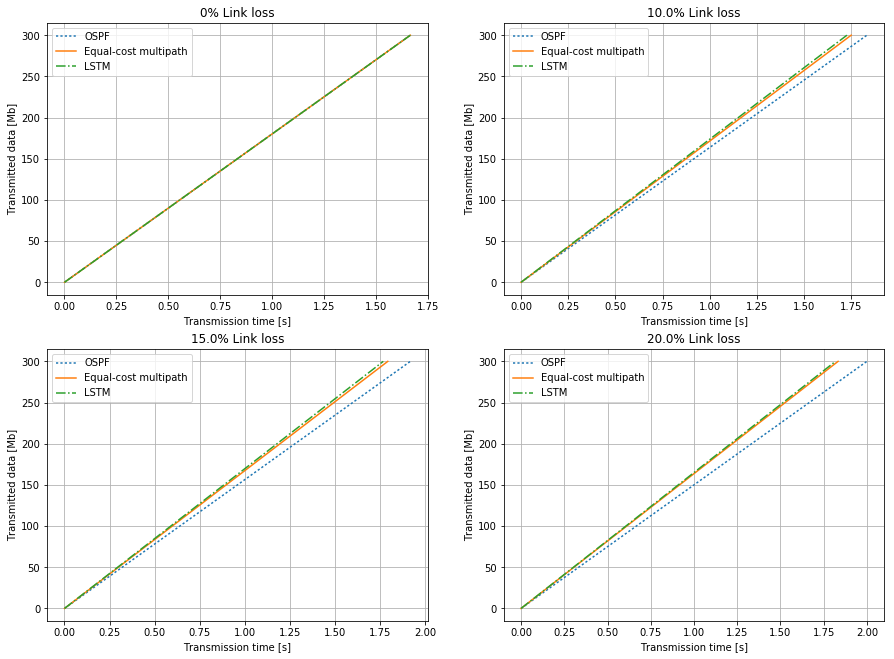

In [36]:
bw = 300.0 #Mbps
traffic = 500.0 #Mb
retransmission = [[0, 0, 0],[0.1, 0.05, 0.0365],[0.15, 0.075, 0.060],[0.2, 0.1, 0.091]]

x = [0, 1.5]
y = [0, 300]

lines = [':', '-', '-.']
positions = [221, 222, 223, 224]
plt.figure(figsize=(15, 11))

for p,losses in enumerate(retransmission):
    plt.subplot(positions[p])
    plt.title('{:}% Link loss'.format(losses[0]*100))
    plt.ylabel('Transmitted data [Mb]')
    plt.xlabel('Transmission time [s]')
    plt.grid()
    for j,loss in enumerate(losses):
        final_time = traffic/bw * (1+loss)
        x = [0, final_time]
        plt.plot(x,y, lines[j])
    plt.legend(['OSPF', 'Equal-cost multipath', 'LSTM'])

plt.show()